## Import Iibrary's ##

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


## Column Types ##

  #### .Numerical - Age,Fare,Passengerld ####
  #### .Categorical - Survived,Pclass,Sex ####
  #### .Mixed - Name,Ticket,Cabin ####

## Univariate Analysis ##

#### steps of doing Univariate Analysis on Numerical columns ####

### Age ###

In [4]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: ylabel='Frequency'>

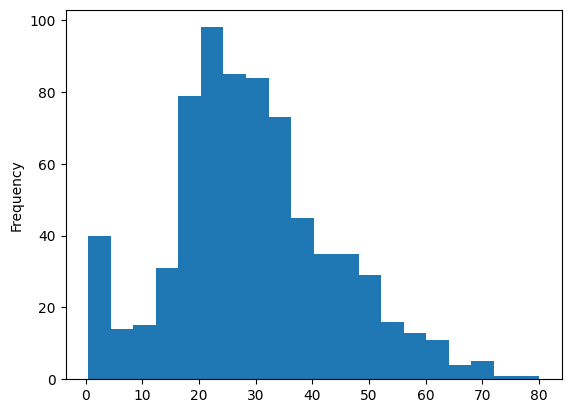

In [5]:
df['Age'].plot(kind='hist',bins=20)

<Axes: ylabel='Density'>

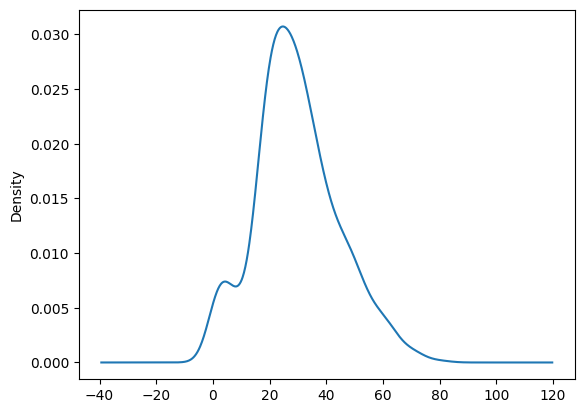

In [6]:
df['Age'].plot(kind='kde')

In [7]:
df['Age'].skew()

0.38910778230082704

<Axes: >

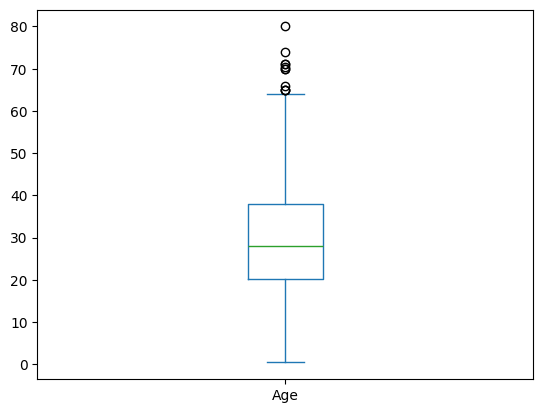

In [8]:
df['Age'].plot(kind='box')

In [9]:
df[df['Age'] > 65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [10]:
df['Age'].isnull().sum()/len(df['Age'])

0.19865319865319866

In [11]:
df['Age'].isnull().sum()/len(df['Age'])*100

19.865319865319865

### conclusions - ###
####        . Age is normally (almost) distributed ####
####        . 20% of the values are missing ####
####        . There are some outliers ####

## Fare ##

In [12]:
df['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [13]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: ylabel='Frequency'>

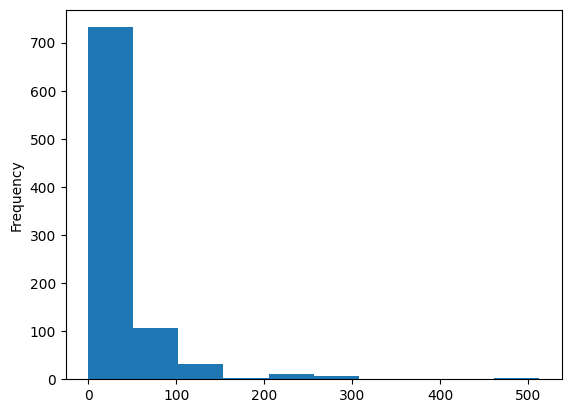

In [14]:
df['Fare'].plot(kind='hist')

<Axes: ylabel='Density'>

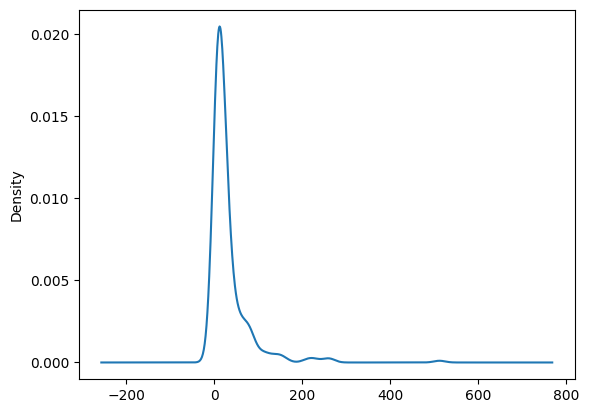

In [15]:
df['Fare'].plot(kind='kde')

In [16]:
df['Fare'].skew()

4.787316519674893

<Axes: >

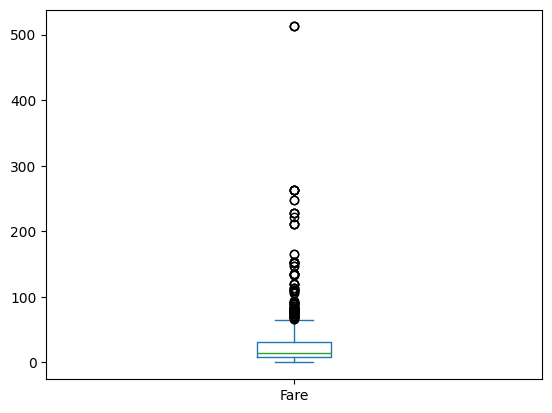

In [17]:
df['Fare'].plot(kind='box')

In [18]:
df[df['Fare'] > 250]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


In [19]:
df['Fare'].isnull().sum()

0

### conclusions - ###
####        . The date is highly positively skewed ####
####        . Fare col acyually contains the group fare & not the individual fare ####
####        . we need to create a new col called indiviadual fare ####

''' Univariate Analysis on Categorical column '''

#### steps of doing Univariate Analysis on Categorical columns ####

## Survived ##

In [20]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

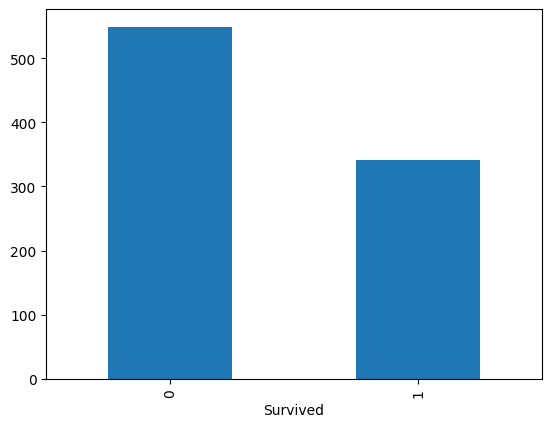

In [21]:
df['Survived'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

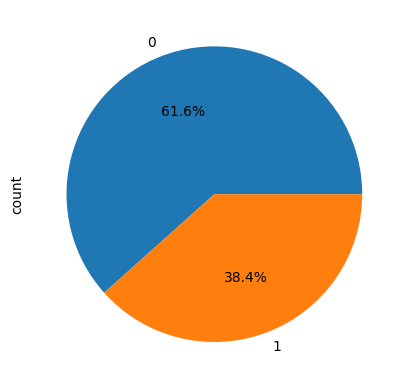

In [22]:
df['Survived'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [23]:
df['Survived'].isnull().sum()

0

### conclusions - ###

## Pclass ##

In [24]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Pclass'>

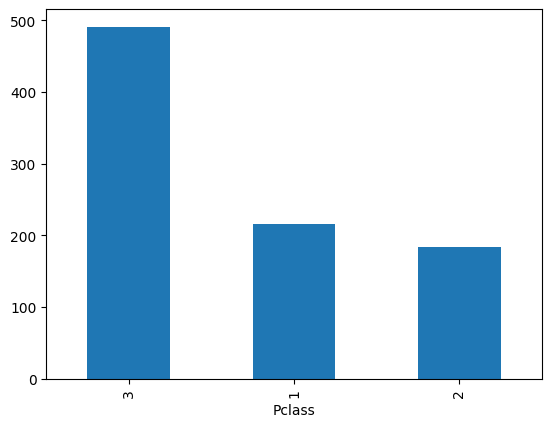

In [25]:
df['Pclass'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

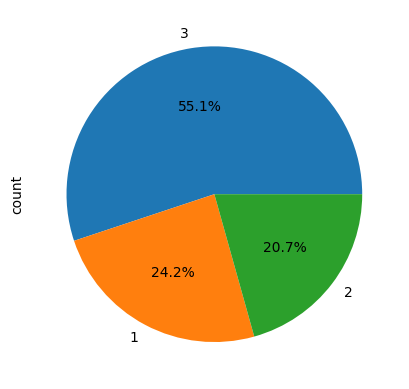

In [26]:
df['Pclass'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [27]:
df['Pclass'].isnull().sum()

0

### conclusions - ###

## Sex ##

In [28]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex'>

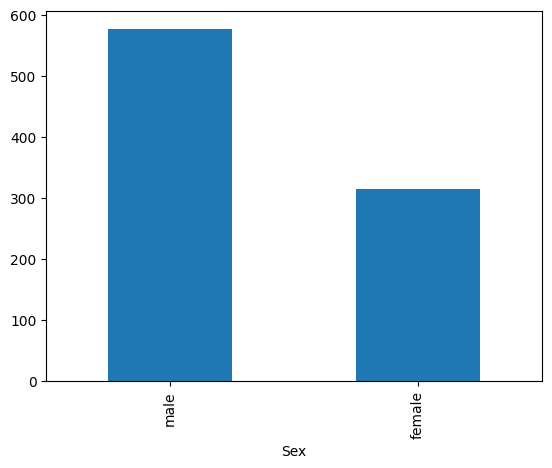

In [29]:
df['Sex'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

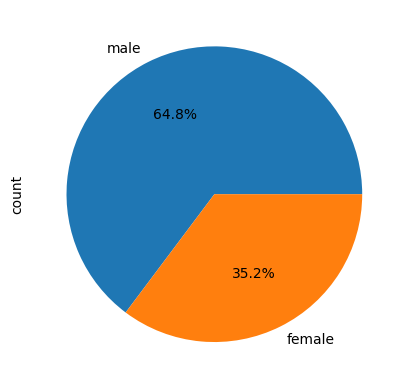

In [30]:
df['Sex'].value_counts().plot(kind='pie',autopct='%0.1f%%')

### conclusions - ###

In [31]:
df['Sex'].isnull().sum()

0

## SibSp ##

In [32]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

<Axes: xlabel='SibSp'>

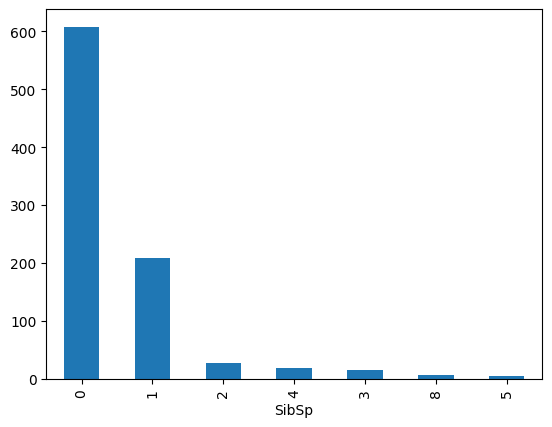

In [33]:
df['SibSp'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

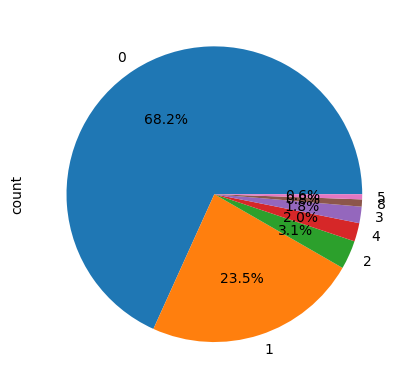

In [34]:
df['SibSp'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [35]:
df['SibSp'].isnull().sum()

0

## Parch ##

In [36]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

<Axes: xlabel='Parch'>

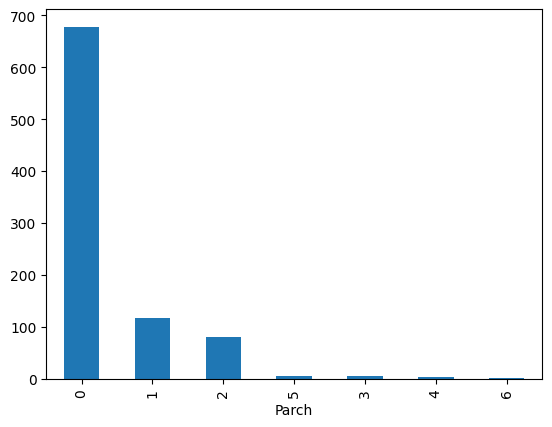

In [37]:
df['Parch'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

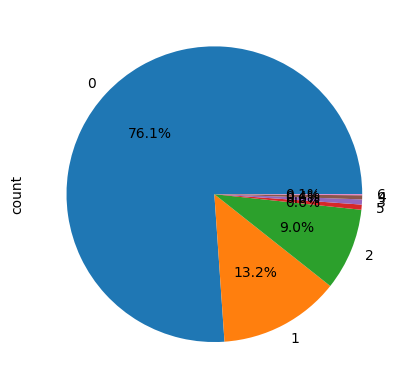

In [38]:
df['Parch'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [39]:
df['Parch'].isnull().sum()

0

### conclusion ###

In [40]:
# Parch and Sibsp cols can be merged to form a new col call family_size
# Create a new col called is_alone

In [41]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

<Axes: xlabel='Embarked'>

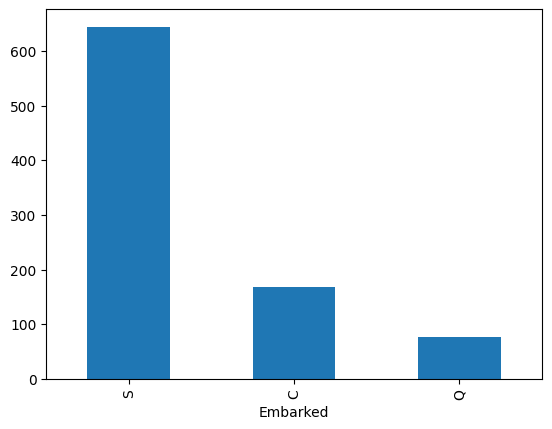

In [42]:
df['Embarked'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

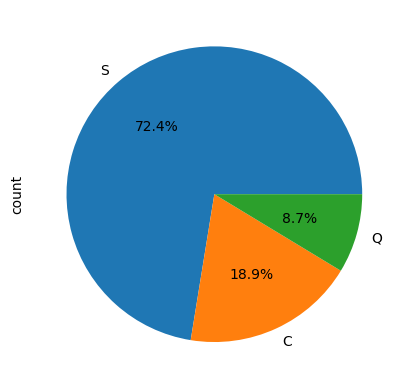

In [43]:
df['Embarked'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [44]:
df['Embarked'].isnull().sum()

2

## Mixed colum need to do feature eng to perform Univariate Analysis ##

## Bivariate Analysis ##

#### steps of doing Univariate Analysis on Numerical columns ####

In [46]:
#    1) choose 2 cols
#    2) Understand type of relationship
#        1)Numeriacal-Numerical
#            a) plot graph like scatterplot,2D histplot,2D KDEplots
#            b) check correlation coefficient to check linear relationship
#        2)Numerical-Categorical
#            a)visulation for distribution of numerical data with different categories
#            b) graphs like barplot,boxplot,kdeplot,scatterplot
#        3)Categorical-Categorical 
#            a) continegency tables
#            b) graphs like heatmap,stacked barplots,treemaps
#    3)conclusions

In [49]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


### Survived and Pclass ###

### categorical-categorical #

In [50]:
pd.crosstab(df['Survived'],df['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [54]:
pd.crosstab(df['Survived'],df['Pclass'],normalize='columns')*100

Pclass,1,2,3
Survived,,,
0,37.037037,52.717391,75.763747
1,62.962963,47.282609,24.236253


<Axes: xlabel='Pclass', ylabel='Survived'>

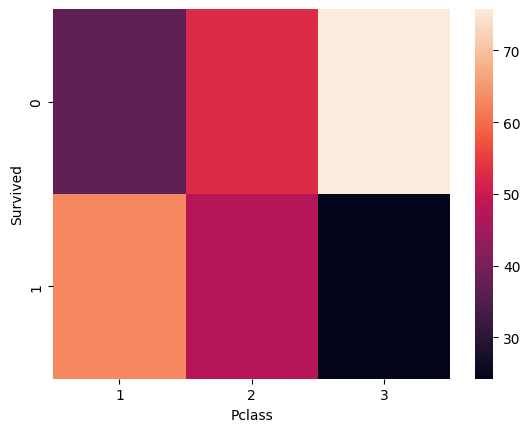

In [55]:
sns.heatmap(pd.crosstab(df['Survived'],df['Pclass'],normalize='columns')*100)

### survived and sex ##

In [56]:
pd.crosstab(df['Survived'],df['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


In [57]:
pd.crosstab(df['Survived'],df['Sex'],normalize='columns')*100

Sex,female,male
Survived,,
0,25.796178,81.109185
1,74.203822,18.890815


<Axes: xlabel='Sex', ylabel='Survived'>

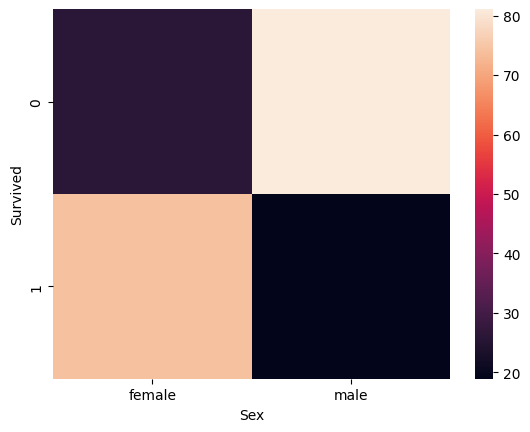

In [58]:
sns.heatmap(pd.crosstab(df['Survived'],df['Sex'],normalize='columns')*100)

### survived and Embarked #

In [59]:
pd.crosstab(df['Survived'],df['Embarked'])

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [61]:
pd.crosstab(df['Survived'],df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Survived,,,
0,44.642857,61.038961,66.304348
1,55.357143,38.961039,33.695652


<Axes: xlabel='Embarked', ylabel='Survived'>

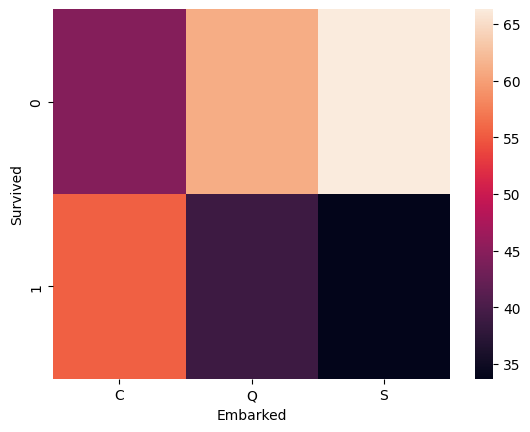

In [60]:
sns.heatmap(pd.crosstab(df['Survived'],df['Embarked'],normalize='columns')*100)

In [65]:
#assumption
pd.crosstab(df['Sex'],df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Sex,,,
female,43.452381,46.753247,31.521739
male,56.547619,53.246753,68.478261


In [64]:
#assumption 2
pd.crosstab(df['Pclass'],df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Pclass,,,
1,50.595238,2.597403,19.720497
2,10.119048,3.896104,25.465839
3,39.285714,93.506494,54.813665


### Survived and Age #
#### categorical - Numerical #

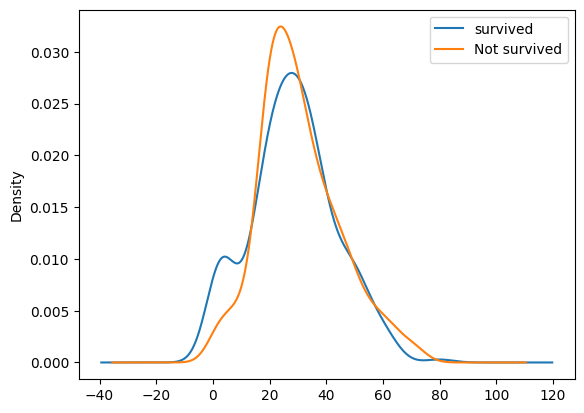

In [69]:
df[df['Survived'] == 1]['Age'].plot(kind='kde',label='survived')
df[df['Survived'] == 0]['Age'].plot(kind='kde',label='Not survived')

plt.legend()
plt.show()

# Feature Eng #

In [70]:
# feature engineering on fare col

In [71]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [73]:
df[df['SibSp'] == 8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [74]:
df1 = pd.read_csv('test.csv')

In [76]:
df = pd.concat([df,df1])

In [85]:
df[df['Ticket']=='CA 2144']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0.0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,NaN,S
71,72,0.0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9,NaN,S
386,387,0.0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,NaN,S
480,481,0.0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9,NaN,S
678,679,0.0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,NaN,S
683,684,0.0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9,NaN,S
139,1031,NaN,3,"Goodwin, Mr. Charles Frederick",male,40.0,1,6,CA 2144,46.9,NaN,S
140,1032,NaN,3,"Goodwin, Miss. Jessie Allis",female,10.0,5,2,CA 2144,46.9,NaN,S


In [84]:
df['Ticket'].value_counts()

Ticket
CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
                ..
113792           1
36209            1
323592           1
315089           1
359309           1
Name: count, Length: 929, dtype: int64

In [86]:
df['individual_fare'] = df['Fare']/(df['SibSp']+df['Parch']+1)

In [87]:
df['individual_fare']

0        3.625000
1       35.641650
2        7.925000
3       26.550000
4        8.050000
          ...    
413      8.050000
414    108.900000
415      7.250000
416      8.050000
417      7.452767
Name: individual_fare, Length: 1309, dtype: float64

In [89]:
df[['individual_fare','Fare']].describe()

,individual_fare,Fare
count,1308.000000,1308.000000
mean,20.518215,33.295479
std,35.774337,51.758668
min,0.000000,0.000000
25%,7.452767,7.895800
50%,8.512483,14.454200
75%,24.237500,31.275000
max,512.329200,512.329200


<Axes: >

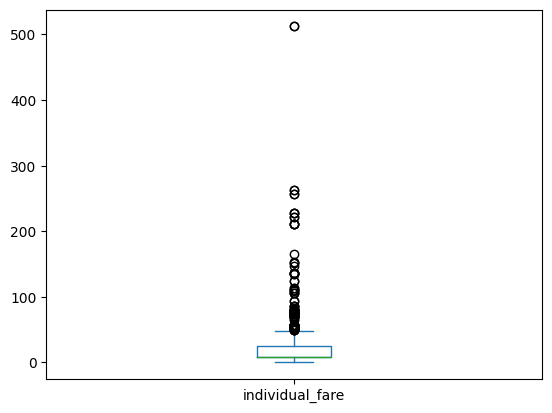

In [88]:
df['individual_fare'].plot(kind='box')

In [90]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.625000
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.925000
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.050000
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.250000
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.050000


In [91]:
df['family_size'] =df['SibSp'] + df['Parch'] + 1

In [92]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.625000,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.925000,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.050000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.050000,1
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000,1
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.250000,1
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.050000,1


In [93]:
# family_type
# if 1 --> alone
#2-4 --> small
#>5 --> large

In [95]:
def transform_family_size(num):

    if num == 1:
        return 'alone'
    elif num>1 and num <5:
        return 'small'
    else:
        return 'large'

In [96]:
df['family_size'].apply(transform_family_size)

0      small
1      small
2      alone
3      small
4      alone
       ...  
413    alone
414    alone
415    alone
416    alone
417    small
Name: family_size, Length: 1309, dtype: object

In [97]:
df['family_type'] = df['family_size'].apply(transform_family_size)

In [98]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size,family_type
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.625000,2,small
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650,2,small
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.925000,1,alone
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000,2,small
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.050000,1,alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.050000,1,alone
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000,1,alone
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.250000,1,alone
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.050000,1,alone


In [101]:
pd.crosstab(df['Survived'],df['family_type'],normalize='columns')*100

family_type,alone,large,small
Survived,,,
0.0,69.646182,83.870968,42.123288
1.0,30.353818,16.129032,57.876712


In [102]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size,family_type
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.625000,2,small
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650,2,small
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.925000,1,alone
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000,2,small
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.050000,1,alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.050000,1,alone
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000,1,alone
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.250000,1,alone
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.050000,1,alone
